In [213]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz, plot_tree
import graphviz

In [214]:
# csv_files = ['FinalHouse.csv', 'FinalGoodDoctor.csv', 'FinalENYC.csv', 'FinalLenoxHill.csv']
# dfs = []
# for file in csv_files:
#     df = pd.read_csv(file)
    
#     # Rename the first column dynamically if column count matches
#     show = df.columns[1]  # Adjust index if needed
#     df = df.rename(columns={df.columns[1]: 'Show'})
    
#     dfs.append(df)

# df = pd.concat(dfs, ignore_index=True)


In [215]:
# df.to_csv('Overall.csv', index=False)

In [216]:
df = pd.read_csv('Overall.csv',delimiter=',',on_bad_lines='skip')
df.head()

,Date,Show,Average,IMDbRating,#Season,TotalSeason,Mean,Median,Quantile
0,2004-11-01,4,47.826087,0.87,1,8,low,high,normal
1,2004-12-01,6,43.086957,0.87,1,8,low,low,low
2,2005-01-01,6,45.739130,0.87,1,8,low,low,normal
3,2005-02-01,7,49.652174,0.87,1,8,high,high,normal
4,2005-03-01,11,47.826087,0.87,1,8,low,high,normal


In [217]:
medianDF = df
medianDF = medianDF.drop(columns=['Date', 'Average', 'Mean', 'Quantile'])

In [218]:
medianDF['Median'] = medianDF['Median'].map({'low':0,'high':1})

X = medianDF.drop('Median', axis=1)
y = medianDF['Median']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [219]:
estx = 100
esty = 500
depx = 1
depy = 5
niter = 10
folds = 5

In [220]:
param_dist = {'n_estimators': randint(estx,esty),
                'max_depth': randint(depx,depy)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                    param_distributions = param_dist, 
                                    n_iter=niter, 
                                    cv=folds)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E4F14844D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E4F131B1D0>})

In [221]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 3, 'n_estimators': 427}


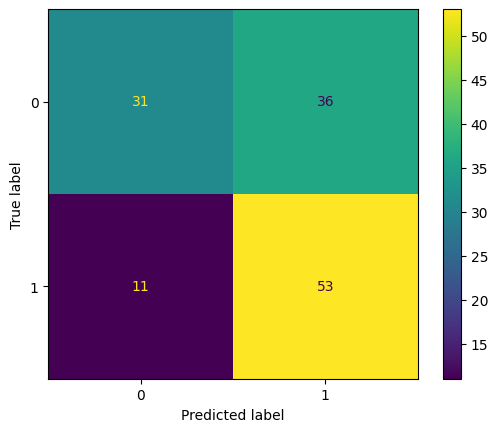

In [222]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [223]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6412213740458015
Precision: 0.5955056179775281
Recall: 0.828125



(process:22608): Pango-WARNING **: 12:14:04.109: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


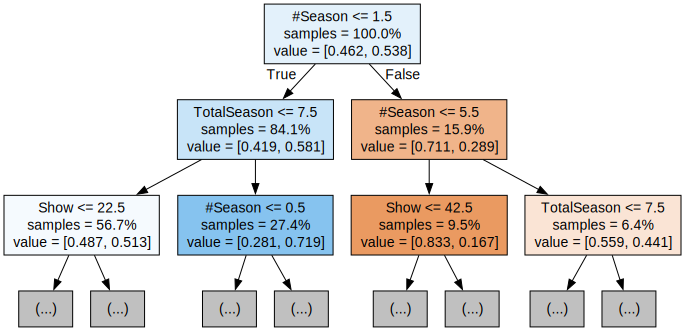


(process:23084): Pango-WARNING **: 12:14:04.661: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


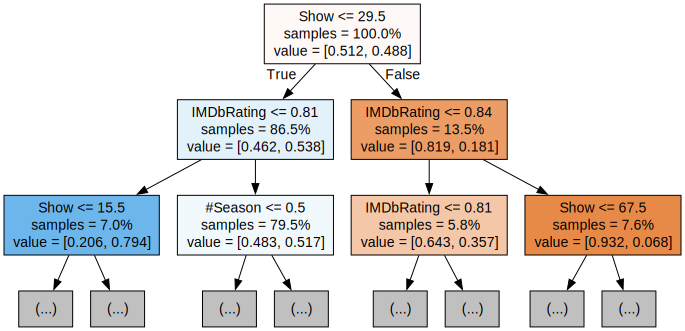


(process:21880): Pango-WARNING **: 12:14:05.213: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


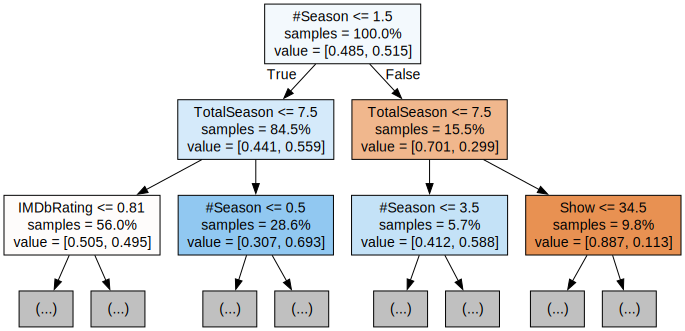

In [224]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = best_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                                feature_names=X_train.columns,  
                                filled=True,  
                                max_depth=2, 
                                impurity=False, 
                                proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

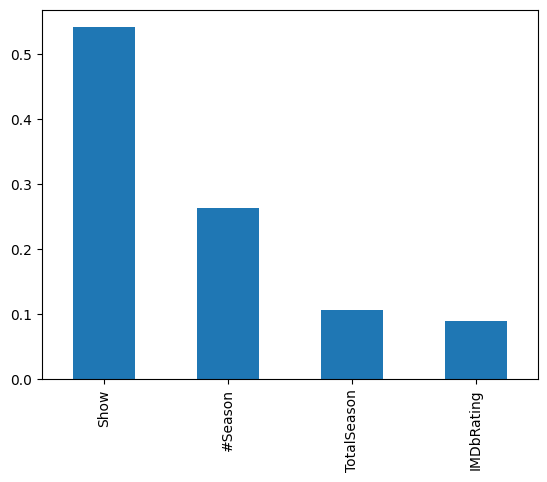

In [225]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

Test Size:  0.1
Best hyperparameters: {'max_depth': 4, 'n_estimators': 499}
Accuracy: 0.7727272727272727
Precision: 0.7575757575757576
Recall: 0.78125


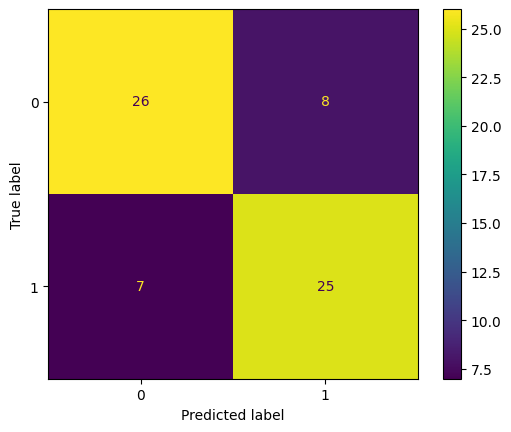

In [226]:
s = 0.1
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=s)
print('Test Size: ',s)

param_dist = {'n_estimators': randint(estx,esty),
                'max_depth': randint(depx,depy)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                    param_distributions = param_dist, 
                                    n_iter=niter, 
                                    cv=folds)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


(process:2660): Pango-WARNING **: 12:14:19.139: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


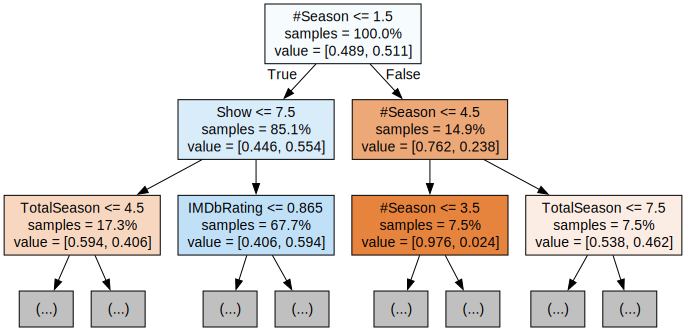


(process:16860): Pango-WARNING **: 12:14:19.728: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


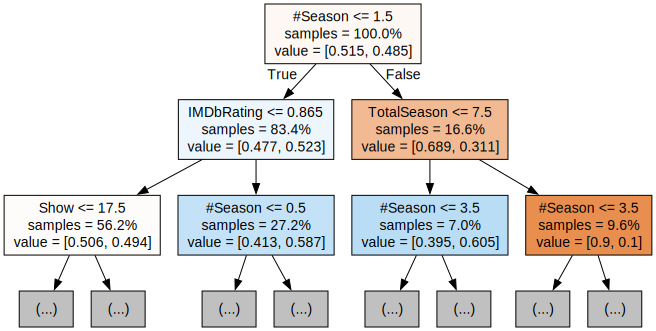


(process:3944): Pango-WARNING **: 12:14:20.371: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


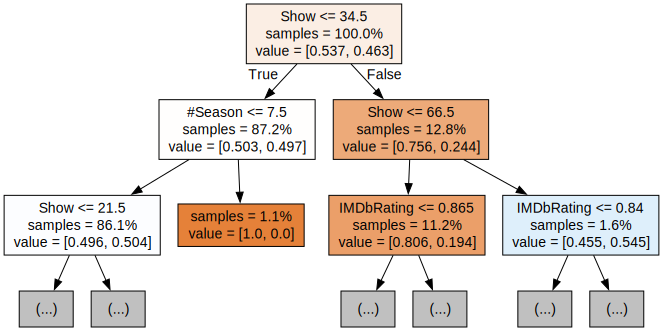

In [227]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = best_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                                feature_names=X_train.columns,  
                                filled=True,  
                                max_depth=2, 
                                impurity=False, 
                                proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Test Size:  0.3
Best hyperparameters: {'max_depth': 3, 'n_estimators': 245}
Accuracy: 0.7142857142857143
Precision: 0.7311827956989247
Recall: 0.6868686868686869


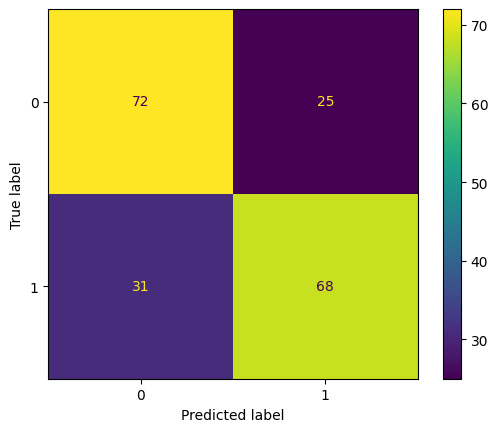

In [228]:
s = 0.3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=s)
print('Test Size: ', s)
param_dist = {'n_estimators': randint(estx,esty),
                'max_depth': randint(depx,depy)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                    param_distributions = param_dist, 
                                    n_iter=niter, 
                                    cv=folds)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


(process:18168): Pango-WARNING **: 12:14:32.324: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


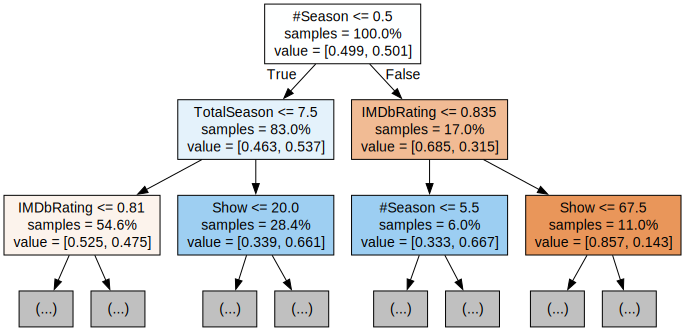


(process:5032): Pango-WARNING **: 12:14:32.869: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


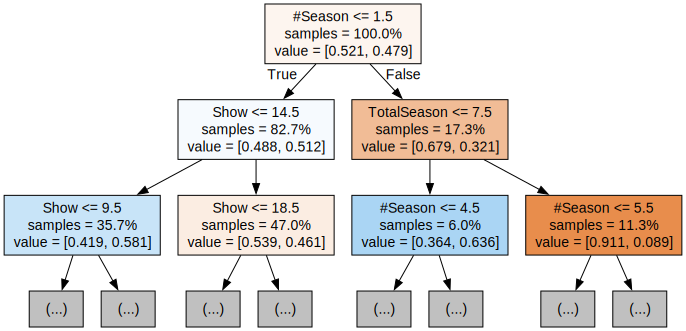


(process:8464): Pango-WARNING **: 12:14:33.415: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


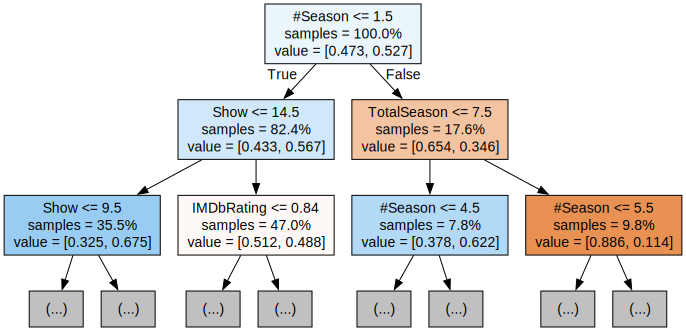

In [229]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = best_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                                feature_names=X_train.columns,  
                                filled=True,  
                                max_depth=2, 
                                impurity=False, 
                                proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Test Size:  0.4
Best hyperparameters: {'max_depth': 4, 'n_estimators': 101}
Accuracy: 0.7279693486590039
Precision: 0.765625
Recall: 0.7050359712230215


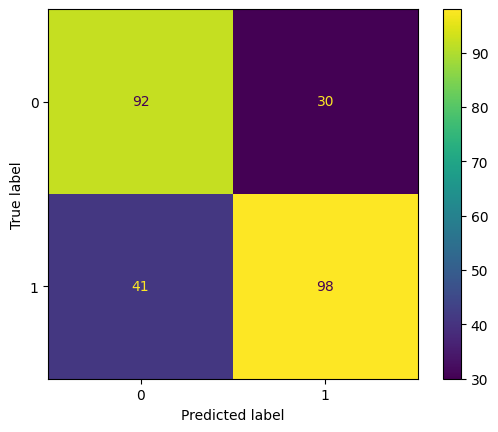

In [230]:
s = 0.4
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=s)
print('Test Size: ', s)
param_dist = {'n_estimators': randint(estx,esty),
                'max_depth': randint(depx,depy)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                    param_distributions = param_dist, 
                                    n_iter=niter, 
                                    cv=folds)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


(process:3140): Pango-WARNING **: 12:14:45.423: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


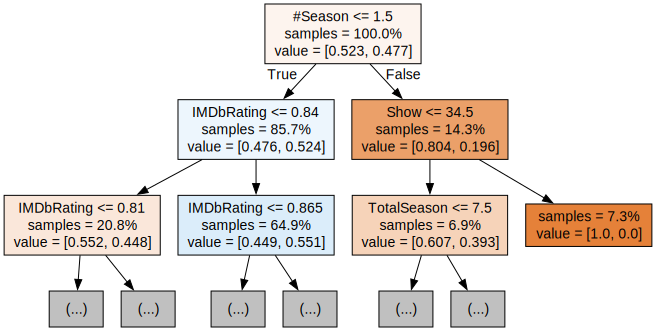


(process:13888): Pango-WARNING **: 12:14:45.993: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


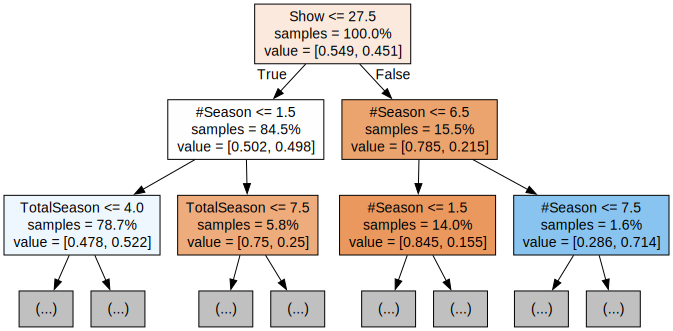


(process:15208): Pango-WARNING **: 12:14:46.549: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


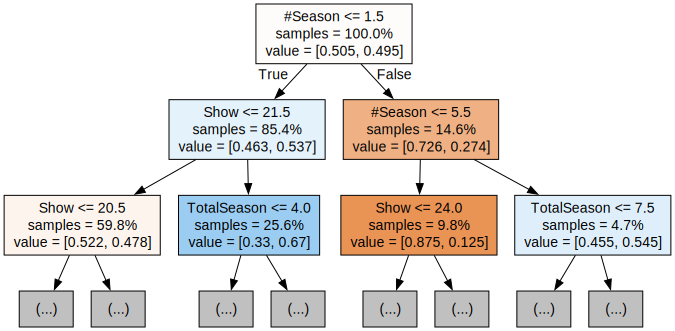

In [231]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = best_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                                feature_names=X_train.columns,  
                                filled=True,  
                                max_depth=2, 
                                impurity=False, 
                                proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Test Size:  0.5
Best hyperparameters: {'max_depth': 4, 'n_estimators': 181}
Accuracy: 0.6687116564417178
Precision: 0.7142857142857143
Recall: 0.5555555555555556


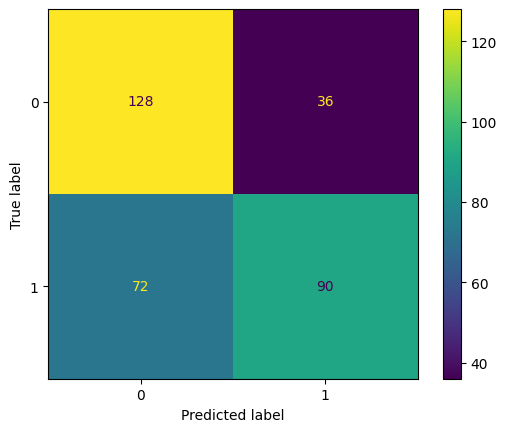

In [232]:
s = 0.5
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=s)
print('Test Size: ', s)
param_dist = {'n_estimators': randint(estx,esty),
                'max_depth': randint(depx,depy)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                    param_distributions = param_dist, 
                                    n_iter=niter, 
                                    cv=folds)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


(process:21620): Pango-WARNING **: 12:14:55.843: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


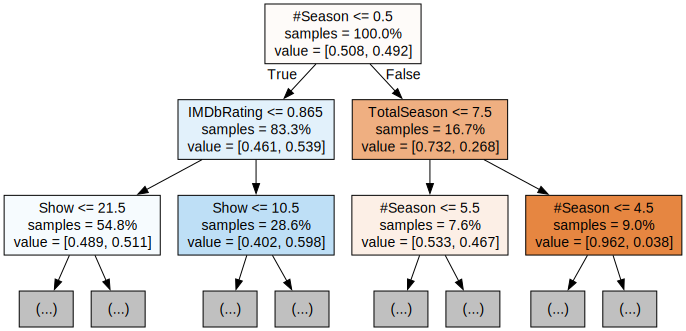


(process:4744): Pango-WARNING **: 12:14:56.371: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


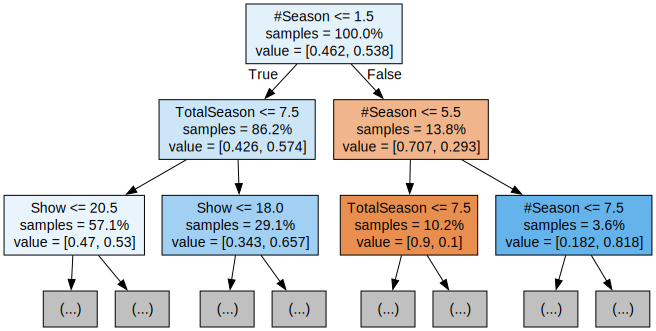


(process:12760): Pango-WARNING **: 12:14:56.968: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


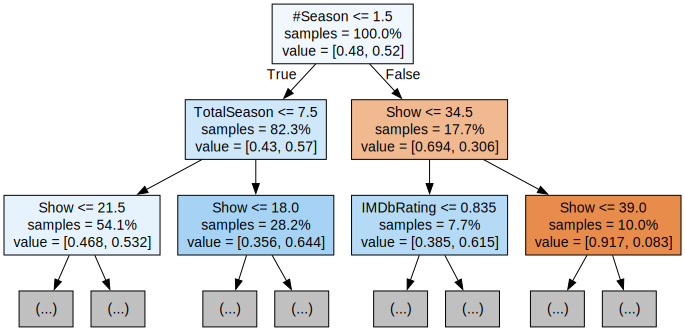

In [233]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = best_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                                feature_names=X_train.columns,  
                                filled=True,  
                                max_depth=2, 
                                impurity=False, 
                                proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)